In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as m

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.size

800

In [19]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230,37,69,22.1
1,44,39,45,10.4
2,17,45,69,12.0
3,151,41,58,16.5
4,180,10,58,17.9


In [7]:
df[['TV','Radio','Newspaper']]=df[['TV','Radio','Newspaper']].astype('int')

In [8]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230,37,69,22.1
1,44,39,45,10.4
2,17,45,69,12.0
3,151,41,58,16.5
4,180,10,58,17.9


In [9]:
df.shape

(200, 4)

# Exploratory Data Analysis

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.size

800

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.00000,200.000000,200.000000
mean,146.570000,22.79000,30.100000,15.130500
std,85.824731,14.82582,21.769233,5.283892
min,0.000000,0.00000,0.000000,1.600000
25%,73.750000,9.75000,12.000000,11.000000
50%,149.000000,22.50000,25.000000,16.000000
75%,218.250000,36.00000,45.000000,19.050000
max,296.000000,49.00000,114.000000,27.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    int64  
 1   Radio      200 non-null    int64  
 2   Newspaper  200 non-null    int64  
 3   Sales      200 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


Data Plotting

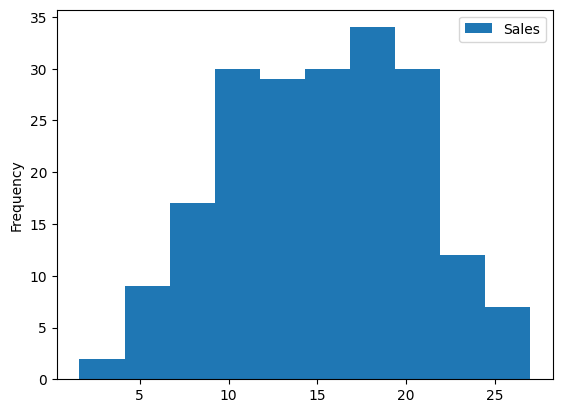

In [15]:
df[['Sales']].plot(kind = "hist", bins = 10)
plt.show()

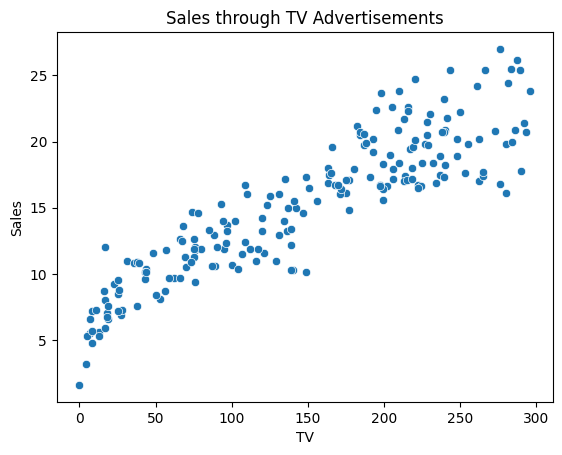

In [21]:
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('Sales through TV Advertisements')
plt.show()

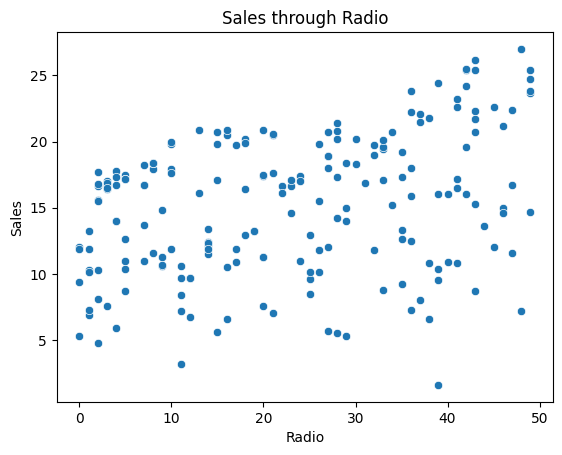

In [23]:
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title("Sales through Radio")
plt.show()

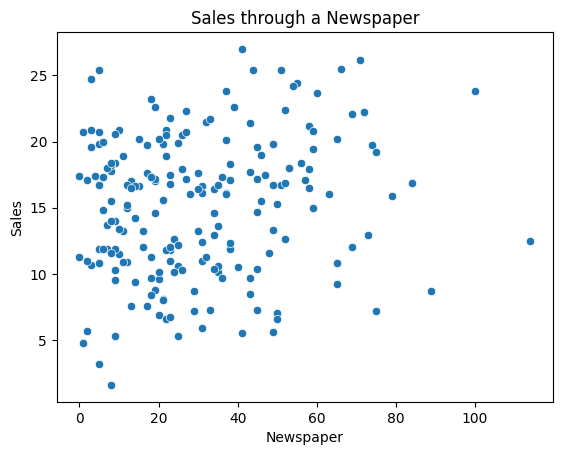

In [26]:
sns.scatterplot(data=df,x='Newspaper',y='Sales')
plt.title("Sales through a Newspaper")
plt.show()

In [27]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.055388,0.055569,0.901096
Radio,0.055388,1.000000,0.352552,0.350823
Newspaper,0.055569,0.352552,1.000000,0.157477
Sales,0.901096,0.350823,0.157477,1.000000


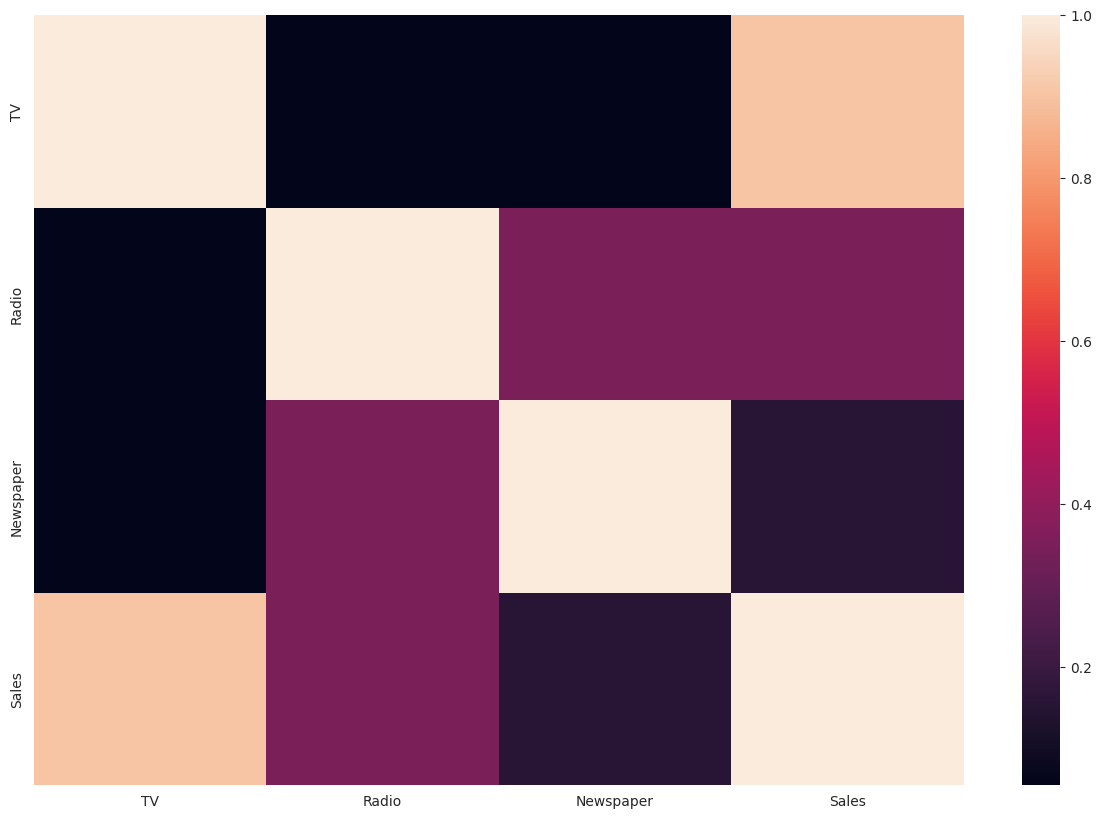

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
sns.heatmap(df.corr())
plt.show()

# Preprocessing

Feature Scaling

In [29]:
X = df.iloc[:,0:3]
y = df.iloc[:,3]

In [30]:
X

,TV,Radio,Newspaper
0,230,37,69
1,44,39,45
2,17,45,69
3,151,41,58
4,180,10,58
...,...,...,...
195,38,3,13
196,94,4,8
197,177,9,6
198,283,42,66


In [31]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

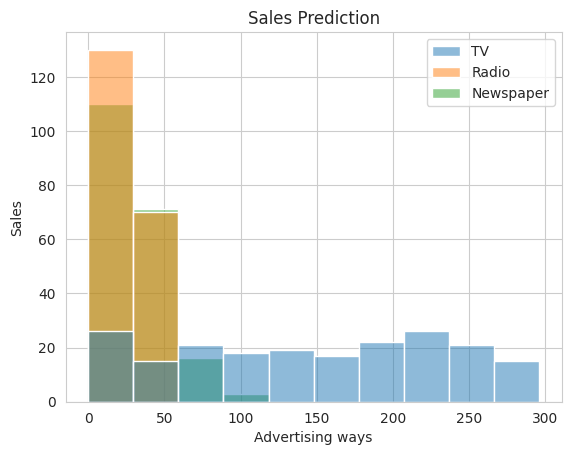

In [32]:
sns.histplot(X,bins = 10)
plt.ylabel('Sales')
plt.xlabel('Advertising ways')
plt.title("Sales Prediction")
plt.show()

Splitting

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [34]:
X.shape

(200, 3)

In [35]:
y.shape

(200,)

Model Selection

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred

array([15.76534173, 18.14672826,  9.74660718, 12.33326334, 11.47671972,
       19.60088673, 18.20810994,  5.22756961, 21.08758791, 12.32938186,
       18.30769171, 15.27472856, 21.02322478, 16.03643179, 19.39358915,
       16.43985307, 12.27930973, 18.89454681,  9.61232724, 13.79771459,
       15.6546839 , 10.91242499,  9.30834424, 17.1646257 , 22.7586575 ,
       13.01597525,  9.63460392,  9.94049847, 16.97014518, 16.51735774,
       14.9079007 , 12.98990809, 10.29508447, 17.85576678,  8.82321594,
        9.66737196, 13.21816265, 21.95388529, 10.61302946, 11.54099775])

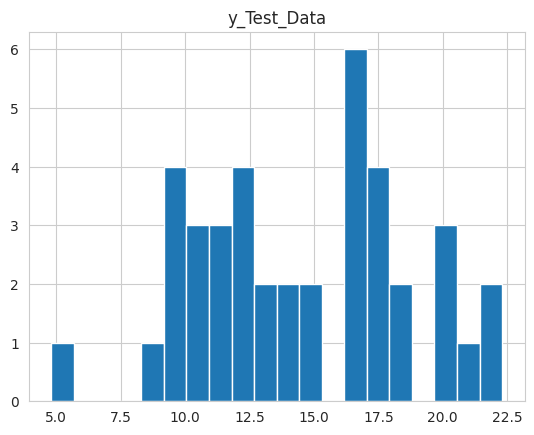

In [41]:
plt.hist(y_test, bins = 20)
plt.title("y_Test_Data")
plt.show()

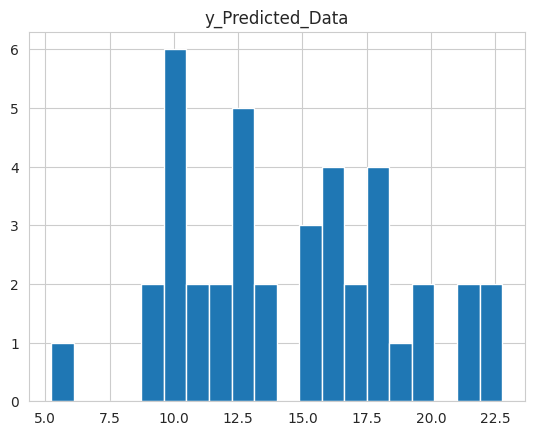

In [42]:
plt.hist(y_pred, bins = 20)
plt.title("y_Predicted_Data")
plt.show()

In [43]:
from sklearn.metrics import r2_score

In [44]:
print("Accuracy of this Model is ",r2_score(y_test,y_pred)*100,'%')

Accuracy of this Model is  90.1134480662919 %
